# more machine learning

In [9]:
import numpy as np
import pandas as pd
from pylab import plt
from sklearn import linear_model
plt.style.use('seaborn')
#matplotlib inline

data_url = 'http://hilpisch.com/tr_eikon_eod_data.csv'
raw = pd.read_csv(data_url, index_col=0,parse_dates=True)
raw.dropna(inplace=True)

symbols = 'EUR='

data = pd.DataFrame(raw[symbols])

data['Returns'] = np.log(data[symbols] / data[symbols].shift(1))
data.dropna(inplace=True)

data['Direction'] = np.sign(data['Returns'])

lags = 5
cols = []
for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    data[col] = data['Returns'].shift(lag)
    cols.append(col)

data.dropna(inplace=True)

data.head()


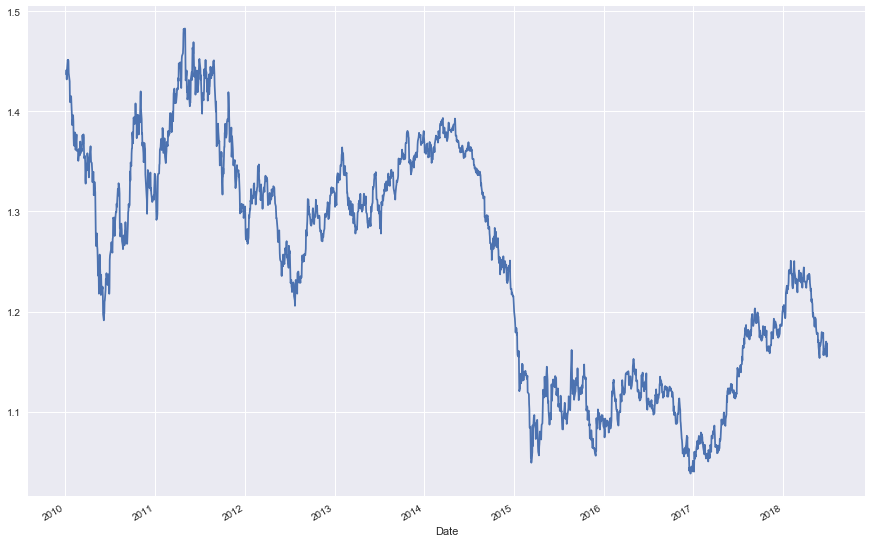

In [11]:
data[symbols].plot(figsize=(15,10));

In [5]:
from sklearn.svm import SVC
from sklearn import linear_model

In [6]:
# so from here we're gonna try and predict future price move

,EUR=,Returns,Direction,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544
2010-01-19,1.4298,-0.005858,-1.0,-0.008309,-0.000551,0.001103,-0.001310,0.006984


In [45]:
lr = linear_model.LogisticRegression(C=1, solver='lbfgs', multi_class='auto') 
# is C goes up, the penalty term applied goes down - check out scikit learn website
# with c = 1, the prediction just came out as 1
# with c = 100, there was some up and down in the predicted future direction guess from the model

In [46]:
lr.fit(data[cols],data['Direction'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
data['Position_lr'] = lr.predict(data[cols])

In [24]:
data['Position_lr'].value_counts()

 1.0    1312
-1.0     820
Name: Position_lr, dtype: int64

In [48]:
data['Strategy_lr'] = data['Position_lr'] * data['Returns']

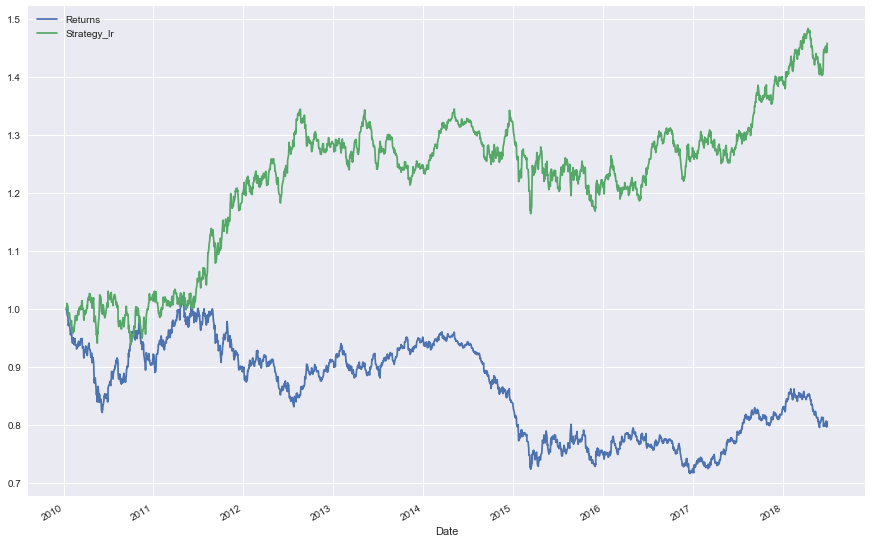

In [26]:
data[['Returns','Strategy_lr']].cumsum().apply(np.exp).plot(figsize=(15,10));

In [49]:
svm = SVC(C=1, gamma='auto')


In [50]:
svm.fit(data[cols], data['Direction'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
data['Position_svm'] = svm.predict(data[cols])

In [52]:
data['Strategy_svm'] = data['Position_svm'] * data['Returns']

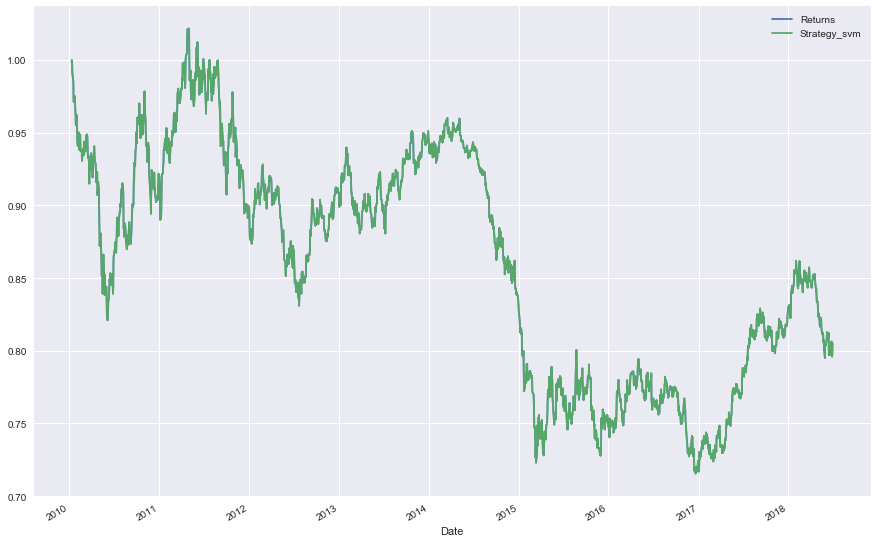

In [31]:
data[['Returns','Strategy_svm']].cumsum().apply(np.exp).plot(figsize=(15,10));
# so no difference between the underlying and the svm prediction, no gains to be made over buy and hold

In [32]:
data.head()

,EUR=,Returns,Direction,lag_1,lag_2,lag_3,lag_4,lag_5,Position_lr,Strategy_lr,Position_svm,Strategy_svm
Date,,,,,,,,,,,,
2010-01-12,1.4494,-0.001310,-1.0,0.006984,0.006544,-0.006544,0.003058,-0.002988,-1.0,0.001310,1.0,-0.001310
2010-01-13,1.4510,0.001103,1.0,-0.001310,0.006984,0.006544,-0.006544,0.003058,-1.0,-0.001103,1.0,0.001103
2010-01-14,1.4502,-0.000551,-1.0,0.001103,-0.001310,0.006984,0.006544,-0.006544,-1.0,0.000551,1.0,-0.000551
2010-01-15,1.4382,-0.008309,-1.0,-0.000551,0.001103,-0.001310,0.006984,0.006544,-1.0,0.008309,1.0,-0.008309
2010-01-19,1.4298,-0.005858,-1.0,-0.008309,-0.000551,0.001103,-0.001310,0.006984,1.0,-0.005858,1.0,-0.005858


In [33]:
data[cols]= np.where(data[cols] > 0,1,0)

In [35]:
data[cols].head()

,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,
2010-01-12,1.0,1.0,0.0,1.0,0.0
2010-01-13,0.0,1.0,1.0,0.0,1.0
2010-01-14,1.0,0.0,1.0,1.0,0.0
2010-01-15,0.0,1.0,0.0,1.0,1.0
2010-01-19,0.0,0.0,1.0,0.0,1.0


###  Train test splitting

In [36]:
### sequential train test split

In [37]:
split= int(len(data) * 0.7)

In [38]:
split

1492

In [39]:
#this is how many rows you would use to train your model

In [40]:
train = data.iloc[:split].copy()
test = data.iloc[split:].copy()
#doing the copy means that you're making a copy rather than referenceing the original

In [41]:
lr.fit(train[cols],train['Direction'])
svm.fit(train[cols],train['Direction'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
test['Position_lr'] = lr.predict(test[cols])
test['Position_svm'] = svm.predict(test[cols])

C:\Users\Admin\Miniconda3\envs\newtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Miniconda3\envs\newtest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
test['Strategy_lr'] = test['Position_lr'] * test['Returns']
test['Strategy_svm'] = test['Position_svm'] * test['Returns']

C:\Users\Admin\Miniconda3\envs\newtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Miniconda3\envs\newtest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


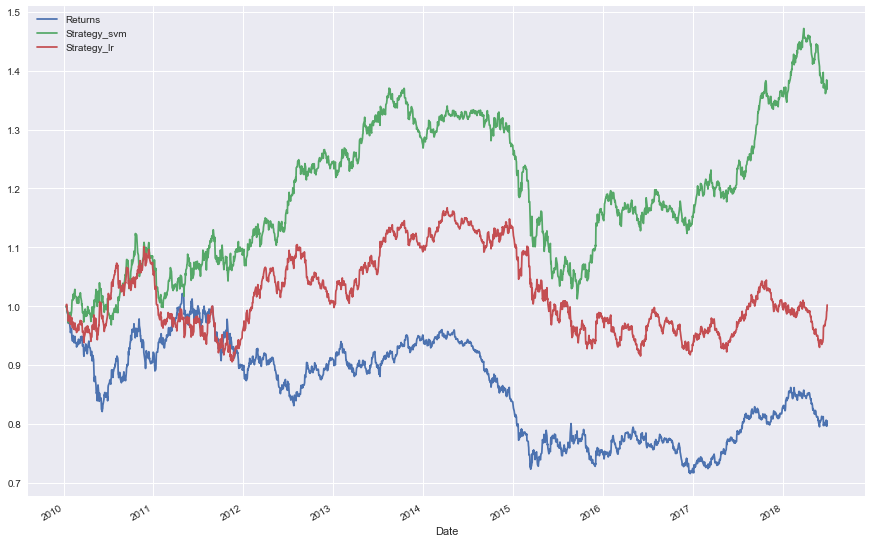

In [55]:
data[['Returns','Strategy_svm','Strategy_lr']].cumsum().apply(np.exp).plot(figsize=(15,10));

In [56]:
## cross validation

In [57]:
## so this is training on the last 70%  and run it agains the the first 30%

In [59]:
from sklearn.model_selection import cross_val_score


In [60]:
cross_val_score(lr, data[cols], data['Direction'], cv = 3)

array([0.48945148, 0.50492264, 0.5084507 ])

In [61]:
# so these numbers are basically saying we're 50/50 on our predictions

In [62]:
cross_val_score(svm, data[cols], data['Direction'], cv =3 )

array([0.4838256 , 0.47679325, 0.50140845])

In [ ]:
# and comparing the two , the LR comes out just above

In [ ]:
## these have all been sequencially trained patterns. it's argualable that the patterns being seen
## you could just use any row regardless of when it happens, that pattern at that time *should* result
## in the same outcome. arguably this is where the lag duration comes in, or lag weighting maybe

In [63]:
from sklearn.model_selection import train_test_split

In [72]:
train_x, test_x, train_y, test_y =  train_test_split(data[cols], data['Direction'], test_size = 0.3, random_state = 50)

In [78]:
train_x = train_x.sort_index().copy()
test_x = test_x.sort_index().copy()
train_y = train_y.sort_index().copy()
test_y = test_y.sort_index().copy()


In [79]:
train_x.head(10)

,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,
2010-01-12,1.0,1.0,0.0,1.0,0.0
2010-01-13,0.0,1.0,1.0,0.0,1.0
2010-01-14,1.0,0.0,1.0,1.0,0.0
2010-01-15,0.0,1.0,0.0,1.0,1.0
2010-01-19,0.0,0.0,1.0,0.0,1.0
2010-01-22,0.0,0.0,0.0,0.0,0.0
2010-01-25,1.0,0.0,0.0,0.0,0.0
2010-01-29,0.0,0.0,0.0,1.0,1.0
2010-02-02,1.0,0.0,0.0,0.0,0.0


In [80]:
lr.fit(train_x[cols],train_y)
svm.fit(train_x[cols],train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
results = pd.DataFrame()
results['Returns'] = test_x['Returns']

KeyError: 'Returns'

In [68]:
test['Position_lr'] = lr.predict(test_x[cols])
test['Position_svm'] = svm.predict(test_x[cols])

C:\Users\Admin\Miniconda3\envs\newtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Miniconda3\envs\newtest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
test['Strategy_lr'] = test['Position_lr'] * test['Returns']
test['Strategy_svm'] = test['Position_svm'] * test['Returns']

C:\Users\Admin\Miniconda3\envs\newtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Miniconda3\envs\newtest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
data[['Returns','Strategy_svm','Strategy_lr']].cumsum().apply(np.exp).plot(figsize=(15,10));